In [3]:
import numpy as np
import pandas as pd

df = pd.DataFrame(data = {
    'product': ['apple', 'banana', 'cherry', 'apple', 'banana', 'cherry', 'apple', 'banana'],
    'category': ['fruit', 'fruit', 'fruit', 'fruit', 'fruit', 'fruit', 'fruit', 'fruit'],
    'price': [1.0, 0.5, 2.0, 1.2, 0.6, 2.2, 1.1, 0.7],
    'quantity': [10, 15, 8, 12, 18, 10, 9, 14],
    'date': pd.date_range('2023-01-01', periods=8, freq='D')
})
df

,product,category,price,quantity,date
0,apple,fruit,1.0,10,2023-01-01
1,banana,fruit,0.5,15,2023-01-02
2,cherry,fruit,2.0,8,2023-01-03
3,apple,fruit,1.2,12,2023-01-04
4,banana,fruit,0.6,18,2023-01-05
5,cherry,fruit,2.2,10,2023-01-06
6,apple,fruit,1.1,9,2023-01-07
7,banana,fruit,0.7,14,2023-01-08


In [4]:
#Отсортировать данные по цене в порядке убывания
df.sort_values('price', ascending=False, inplace=True)
df

,product,category,price,quantity,date
5,cherry,fruit,2.2,10,2023-01-06
2,cherry,fruit,2.0,8,2023-01-03
3,apple,fruit,1.2,12,2023-01-04
6,apple,fruit,1.1,9,2023-01-07
0,apple,fruit,1.0,10,2023-01-01
7,banana,fruit,0.7,14,2023-01-08
4,banana,fruit,0.6,18,2023-01-05
1,banana,fruit,0.5,15,2023-01-02


In [5]:
#Посчитайте общее количество проданных товаров по каждой категории
category_sales = df.groupby('category')['quantity'].sum()
category_sales

category
fruit    96
Name: quantity, dtype: int64

In [7]:
#Для каждого продукта вычислите среднюю цену и общее количество продаж
product_stat= df.groupby('product').agg({'price':'mean', 'quantity' : 'sum' }). rename(columns ={'price':'avg_price', 'quantity':'total_sales'})
product_stat


,avg_price,total_sales
product,,
apple,1.1,31
banana,0.6,47
cherry,2.1,18


In [9]:
#Добавьте столбец 'month', извлекая месяц из даты, и посчитайте общее количество продаж по месяцам
df['month'] = df['date'].dt.month #метод dt работает с датами
df['month_total'] = df.groupby(['month'])['quantity'].transform('sum')
df.sort_values('month_total', ascending = False)

,product,category,price,quantity,date,month,month_total
5,cherry,fruit,2.2,10,2023-01-06,1,96
2,cherry,fruit,2.0,8,2023-01-03,1,96
3,apple,fruit,1.2,12,2023-01-04,1,96
6,apple,fruit,1.1,9,2023-01-07,1,96
0,apple,fruit,1.0,10,2023-01-01,1,96
7,banana,fruit,0.7,14,2023-01-08,1,96
4,banana,fruit,0.6,18,2023-01-05,1,96
1,banana,fruit,0.5,15,2023-01-02,1,96


In [10]:
#Найдите самый популярный товар (с наибольшим общим количеством продаж)
df.groupby('product')['quantity'].sum().sort_values(ascending=False) #Находим сумму количества продаж и сортируем от большего к меньшему


product
banana    47
apple     31
cherry    18
Name: quantity, dtype: int64

In [6]:
#Найдите все товары, цена которых выше 1.0, и вычислите общую выручку от их продаж (выручка = цена × количество)
prod_over_1= df.loc[df['price']>1.0] #Создаём dataFrame с продуктами, у кот цена выше 1.0
prod_over_1['amount']=prod_over_1['price']*prod_over_1['quantity']
print(prod_over_1)

C:\Users\stacy\AppData\Local\Temp\ipykernel_13728\34651074.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prod_over_1['amount']=prod_over_1['price']*prod_over_1['quantity']


  product category  price  quantity       date  amount
5  cherry    fruit    2.2        10 2023-01-06    22.0
2  cherry    fruit    2.0         8 2023-01-03    16.0
3   apple    fruit    1.2        12 2023-01-04    14.4
6   apple    fruit    1.1         9 2023-01-07     9.9


In [11]:
#Вычислите среднюю цену товаров в каждой категории
df.groupby('category')['price'].mean()

category
fruit    1.1625
Name: price, dtype: float64

In [12]:
#Создайте новый столбец 'revenue' (выручка = цена × количество) для каждой строки
df['revenue']= df['price']*df['quantity']
df

,product,category,price,quantity,date,month,month_total,revenue
5,cherry,fruit,2.2,10,2023-01-06,1,96,22.0
2,cherry,fruit,2.0,8,2023-01-03,1,96,16.0
3,apple,fruit,1.2,12,2023-01-04,1,96,14.4
6,apple,fruit,1.1,9,2023-01-07,1,96,9.9
0,apple,fruit,1.0,10,2023-01-01,1,96,10.0
7,banana,fruit,0.7,14,2023-01-08,1,96,9.8
4,banana,fruit,0.6,18,2023-01-05,1,96,10.8
1,banana,fruit,0.5,15,2023-01-02,1,96,7.5


In [13]:
#Найдите месяц с наибольшей выручкой
monthly_revenue = df.groupby('month')['revenue'].sum() #Считаем общую выручку за каждый месяц
monthly_revenue.idxmax()  # месяц с наибольшей выручкой
monthly_revenue.max()     # максимальная выручка

np.float64(100.39999999999999)

In [14]:
#Посчитайте накопительную сумму продаж по датам
date_sort = df.sort_values('date', ascending = True)
date_sort['cum_sum']=date_sort['revenue'].cumsum()
date_sort

,product,category,price,quantity,date,month,month_total,revenue,cum_sum
0,apple,fruit,1.0,10,2023-01-01,1,96,10.0,10.0
1,banana,fruit,0.5,15,2023-01-02,1,96,7.5,17.5
2,cherry,fruit,2.0,8,2023-01-03,1,96,16.0,33.5
3,apple,fruit,1.2,12,2023-01-04,1,96,14.4,47.9
4,banana,fruit,0.6,18,2023-01-05,1,96,10.8,58.7
5,cherry,fruit,2.2,10,2023-01-06,1,96,22.0,80.7
6,apple,fruit,1.1,9,2023-01-07,1,96,9.9,90.6
7,banana,fruit,0.7,14,2023-01-08,1,96,9.8,100.4


In [15]:
#Как добавить элементы в класс Series
gdps = pd.Series(data=[3574, 1234, 9876, 5376, 3285, 8463], index = ['Asia', 'North America','Europe', 'South America', 'Africa', 'Oceania'])
gdps_2 = pd.Series(data=[1, 2], index = ['Antarctica','Arctica'])
gdps_3 = pd.concat([gdps, gdps_2]) # Синтаксис добавления в Series несколько значений.

print(gdps_3) #Выводит все значения ключ-значение
# print(gdp_regions.index) #Выводит все индексы (ключи)
# print(gdp_regions['Antarctica']) #Выводит значение с определенным ключом

Asia             3574
North America    1234
Europe           9876
South America    5376
Africa           3285
Oceania          8463
Antarctica          1
Arctica             2
dtype: int64


In [16]:
sales_data = {
    'date': pd.date_range('2023-01-01', periods=10),
    'product': ['apple', 'banana', 'cherry', 'apple', 'banana', 'cherry', 'apple', 'banana', 'cherry', 'apple'],
    'quantity': [5, 3, 2, 4, 6, 1, 7, 2, 3, 4],
    'price': [1.0, 0.5, 2.0, 1.1, 0.6, 2.1, 1.0, 0.5, 2.0, 1.2]
}
df2 = pd.DataFrame(sales_data)
df2

,date,product,quantity,price
0,2023-01-01,apple,5,1.0
1,2023-01-02,banana,3,0.5
2,2023-01-03,cherry,2,2.0
3,2023-01-04,apple,4,1.1
4,2023-01-05,banana,6,0.6
5,2023-01-06,cherry,1,2.1
6,2023-01-07,apple,7,1.0
7,2023-01-08,banana,2,0.5
8,2023-01-09,cherry,3,2.0
9,2023-01-10,apple,4,1.2


In [17]:
#Найдите общее количество проданных товаров
df2['quantity'].sum()

np.int64(37)

In [18]:
#Найдите самый популярный товар (по количеству продаж)
total_products = df2.groupby('product')['quantity'].sum()
type(total_products) #total_products это Series
total_products.sort_values(ascending=False).head(1)


product
apple    20
Name: quantity, dtype: int64

In [19]:
#Посчитайте общую выручку по каждому товару
df2['revenue']=df2['price']*df2['quantity']
df2.groupby('product')['revenue'].sum()

product
apple     21.2
banana     6.1
cherry    12.1
Name: revenue, dtype: float64

In [20]:
#Найдите день с максимальной выручкой
max_rev_by_date = df2.groupby('date')['revenue'].max()
max_rev_by_date.sort_values(ascending=False).head(1)

date
2023-01-07    7.0
Name: revenue, dtype: float64

In [21]:
#Посчитайте среднюю цену для каждого товара
df2['avg_price'] = df2.groupby('product')['price'].transform('mean')
df2

,date,product,quantity,price,revenue,avg_price
0,2023-01-01,apple,5,1.0,5.0,1.075000
1,2023-01-02,banana,3,0.5,1.5,0.533333
2,2023-01-03,cherry,2,2.0,4.0,2.033333
3,2023-01-04,apple,4,1.1,4.4,1.075000
4,2023-01-05,banana,6,0.6,3.6,0.533333
5,2023-01-06,cherry,1,2.1,2.1,2.033333
6,2023-01-07,apple,7,1.0,7.0,1.075000
7,2023-01-08,banana,2,0.5,1.0,0.533333
8,2023-01-09,cherry,3,2.0,6.0,2.033333
9,2023-01-10,apple,4,1.2,4.8,1.075000


In [22]:
#Найдите минимальное и максимальное количество продаж для каждого товара
min_quantity = df2.groupby('product')['quantity'].min()
max_quantity = df2.groupby('product')['quantity'].max()


In [23]:
#Посчитайте общую выручку по дням
revenue_by_day = df2.groupby('date')['revenue'].sum()
revenue_by_day

date
2023-01-01    5.0
2023-01-02    1.5
2023-01-03    4.0
2023-01-04    4.4
2023-01-05    3.6
2023-01-06    2.1
2023-01-07    7.0
2023-01-08    1.0
2023-01-09    6.0
2023-01-10    4.8
Name: revenue, dtype: float64

In [26]:
#Создайте сводную таблицу: товары по дням с количеством продаж
prod_by_date_and_quantity = df2.pivot_table(values='quantity', index='date', columns='product')
prod_by_date_and_quantity.fillna(0)


prod_by_date_and_quantity = df2.pivot_table(
    values='quantity',
    index='date',
    columns='product',
    aggfunc='sum',  # Явно указываем агрегатную функцию
    fill_value=0
)
prod_by_date_and_quantity

product,apple,banana,cherry
date,,,
2023-01-01,5,0,0
2023-01-02,0,3,0
2023-01-03,0,0,2
2023-01-04,4,0,0
2023-01-05,0,6,0
2023-01-06,0,0,1
2023-01-07,7,0,0
2023-01-08,0,2,0
2023-01-09,0,0,3


In [27]:
quantity_stats = df2.groupby('product')['quantity'].agg(['min', 'max'])
quantity_stats

,min,max
product,,
apple,4,7
banana,2,6
cherry,1,3


In [28]:
#Новое задание
import pandas as pd
import numpy as np

# Фиксированное соответствие продуктов и категорий
product_categories = {
    'apple': 'fruit',
    'banana': 'fruit',
    'cherry': 'fruit',
    'blueberry': 'berry',
    'raspberry': 'berry'
}

# Создаем данные о продажах
np.random.seed(42)
dates = pd.date_range('2023-01-01', '2023-03-31')
n_records = 200

data = {
    'date': np.random.choice(dates, n_records),
    'product': np.random.choice(list(product_categories.keys()), n_records),
    'quantity': np.random.randint(1, 20, n_records),
    'price': np.round(np.random.uniform(0.5, 5.0, n_records), 2)
}

# Создаем DataFrame
df3 = pd.DataFrame(data)

# Добавляем категорию на основе продукта
df3['category'] = df3['product'].map(product_categories)

# Добавляем выручку
df3['revenue'] = df3['price'] * df3['quantity']

# Проверяем соответствие продуктов и категорий
print("Проверка соответствия продуктов и категорий:")
print(df3.groupby(['product', 'category']).size().reset_index(name='count'))

df3

Проверка соответствия продуктов и категорий:
     product category  count
0      apple    fruit     47
1     banana    fruit     36
2  blueberry    berry     45
3     cherry    fruit     42
4  raspberry    berry     30


,date,product,quantity,price,category,revenue
0,2023-02-21,banana,19,3.82,fruit,72.58
1,2023-01-15,cherry,5,4.62,fruit,23.10
2,2023-03-13,apple,9,4.81,fruit,43.29
3,2023-03-02,raspberry,12,0.76,berry,9.12
4,2023-01-21,apple,1,2.28,fruit,2.28
...,...,...,...,...,...,...
195,2023-03-03,banana,14,4.89,fruit,68.46
196,2023-02-27,blueberry,15,2.71,berry,40.65
197,2023-02-21,banana,1,3.75,fruit,3.75
198,2023-01-12,cherry,3,4.19,fruit,12.57


In [29]:
"""Задание 1: Для каждой категории и каждого продукта посчитайте: Общее количество продаж, Среднюю цену, Общую выручку, Долю продукта в общей выручке категории"""
category_product_stats = df3.groupby(['category', 'product']).agg({'quantity':'sum', 'price':'mean','revenue':'sum'}).reset_index()

category_total = df3.groupby('category')['revenue'].sum().reset_index(name='category_total')
category_product_stats = pd.merge(category_product_stats, category_total, on='category')
category_product_stats['prod_share_rev'] = category_product_stats['revenue']/category_product_stats['category_total']
category_product_stats['prod_share_rev'] = category_product_stats['prod_share_rev'].apply(lambda x: round(x, 2))
category_product_stats

,category,product,quantity,price,revenue,category_total,prod_share_rev
0,berry,blueberry,416,2.745333,1193.67,1978.05,0.60
1,berry,raspberry,297,2.499000,784.38,1978.05,0.40
2,fruit,apple,506,2.837447,1501.46,3664.84,0.41
3,fruit,banana,357,2.890278,1070.37,3664.84,0.29
4,fruit,cherry,438,2.525238,1093.01,3664.84,0.30


In [30]:
"""Задача 2: Ранжирование внутри групп.
Задание: Для каждой категории продуктов:Присвойте ранг каждому продукту по убыванию общей выручки
Найдите топ-2 продукта в каждой категории по выручке
Посчитайте разницу в выручке между первым и вторым местом в каждой категории"""

# df3['total_revenue']= df3.groupby(['category', 'product'], as_index=False)['revenue'].transform('sum')
category_revenue = df3.groupby(['category', 'product'])['revenue'].sum().reset_index()

category_revenue['rank'] = category_revenue.groupby('category')['revenue'].rank(ascending=False, method='dense')

top_2 = category_revenue[category_revenue['rank']<=2]
pivot_ranks = top_2.pivot(index='category', columns='rank', values='revenue').reset_index()

pivot_ranks['revenue_diff'] = pivot_ranks[1.0] - pivot_ranks[2.0]
pivot_ranks
# fruit_rank = df3[df3['category'].isin(['fruit'])]
# fruit_rank.sort_values(by=['total_revenue'], ascending=False)
# fruit_rank['rank'] = fruit_rank['total_revenue'].rank(method='dense', ascending=False)
#
# berry_rank = df3[df3['category'].isin(['berry'])]
# berry_rank.sort_values(by=['total_revenue'], ascending=False)
# berry_rank['rank'] = berry_rank['total_revenue'].rank(method='dense', ascending=False)

# ranked_fr_br = pd.merge(berry_rank, fruit_rank, how='outer')
# ranked_df3 = pd.merge(df3, ranked_fr_br, how='left')
# top_2_fruit = fruit_rank.groupby(['rank', 'product'])['revenue'].sum()
# top_2_fruit.head(2)
# top_2_berries = berry_rank.groupby(['rank', 'product'])['revenue'].sum()
# top_2_berries.head(2)

rank,category,1.0,2.0,revenue_diff
0,berry,1193.67,784.38,409.29
1,fruit,1501.46,1093.01,408.45


In [31]:
"""Задача 3: Скользящие агрегаты и оконные функции
Задание: Для каждого продукта:
Посчитайте скользящее среднее количества продаж за 7 дней
Найдите дни, когда количество продаж было выше скользящего среднего на 50%
Посчитайте накопительную сумму выручки для каждого продукта"""
df3_sorted = df3.sort_values(['product', 'date']).reset_index(drop=True)
df3_sorted['rolling_week_avg'] = df3_sorted.groupby('product')['quantity'].transform(lambda x: x.rolling(7, min_periods=1).mean()) #Применяем скользящее окно в 7 дней и применяем у нему среднее (mean)
df3_sorted['above_avg_50'] = df3_sorted['quantity'] > (df3_sorted['rolling_week_avg'] * 1.5)
df3_sorted['cumulative_revenue'] = df3_sorted.groupby(['product'])['revenue'].transform('cumsum')
print(df3_sorted)

          date    product  quantity  price category  revenue  \
0   2023-01-01      apple        10   4.94    fruit    49.40   
1   2023-01-02      apple        19   4.86    fruit    92.34   
2   2023-01-04      apple         2   4.17    fruit     8.34   
3   2023-01-04      apple         6   4.40    fruit    26.40   
4   2023-01-07      apple         5   0.64    fruit     3.20   
..         ...        ...       ...    ...      ...      ...   
195 2023-03-26  raspberry        17   1.84    berry    31.28   
196 2023-03-29  raspberry         4   1.31    berry     5.24   
197 2023-03-29  raspberry        14   2.67    berry    37.38   
198 2023-03-30  raspberry         7   3.96    berry    27.72   
199 2023-03-30  raspberry         1   1.60    berry     1.60   

     rolling_week_avg  above_avg_50  cumulative_revenue  
0           10.000000         False               49.40  
1           14.500000         False              141.74  
2           10.333333         False              150.08  

In [32]:
"""Задача 4: Анализ перцентилей
Задание: Для каждой категории:
Посчитайте 25-й, 50-й и 75-й перцентили цены
Определите, к какому перцентилю относится каждый продукт в своей категории
Найдите продукты, которые находятся в верхнем квартиле (75-100%) по цене в своей категории"""

# Вычисляем перцентили для каждой категории (unstack() чтобы развернуть таблицу и столбцы были квантилями)
percentiles = df3.groupby('category')['price'].quantile([0.25, 0.5, 0.75]).unstack()

percentiles.columns = ['p25', 'p50', 'p75']

# Определяем перцентиль для каждого продукта
product_stats = df3.groupby(['category', 'product'])['price'].mean().reset_index()
product_stats = pd.merge(product_stats, percentiles, on='category')
product_stats

,category,product,price,p25,p50,p75
0,berry,blueberry,2.745333,1.615,2.67,3.73
1,berry,raspberry,2.499000,1.615,2.67,3.73
2,fruit,apple,2.837447,1.710,2.90,3.82
3,fruit,banana,2.890278,1.710,2.90,3.82
4,fruit,cherry,2.525238,1.710,2.90,3.82


In [33]:
"""Задача 5: Сложная агрегация с несколькими метриками
Задание: Создайте сводную таблицу, которая показывает:
Для каждого продукта в каждой категории
Общее количество продаж
Среднее количество продаж в день
Коэффициент вариации (стандартное отклонение / среднее) количества продаж
День с максимальными продажами для каждого продукта"""

# Создаем сводную таблицу с несколькими метриками
pivot_table = df3.groupby(['category', 'product']).agg({
    'quantity': ['sum', 'mean', 'std'],
    'date': lambda x: x.loc[df3.loc[x.index, 'quantity'].idxmax()]  # день с максимальными продажами
}).round(2)
pivot_table.columns = ['total_quantity', 'avg_daily_quantity', 'std_quantity', 'max_sales_date'] #Переименование колонок
pivot_table['cv_quantity'] = (pivot_table['std_quantity']/pivot_table['avg_daily_quantity']).round(2)
pivot_table

total_quantity  avg_daily_quantity  std_quantity  \
category product                                                       
berry    blueberry             416                9.24          5.35   
         raspberry             297                9.90          5.68   
fruit    apple                 506               10.77          6.02   
         banana                357                9.92          6.00   
         cherry                438               10.43          5.26   

                   max_sales_date  cv_quantity  
category product                                
berry    blueberry     2023-01-05         0.58  
         raspberry     2023-03-20         0.57  
fruit    apple         2023-01-02         0.56  
         banana        2023-02-21         0.60  
         cherry        2023-03-31         0.50

In [35]:
#Работа с максимальными значениями и их индексами
# Для DataFrame
"""idxmax() работает с объектами Pandas и возвращает метку индекса"""
df4 = pd.DataFrame({
    'A': [1, 5, 3],
    'B': [4, 2, 6],
    'C': [7, 8, 9]
}, index=['row1', 'row2', 'row3'])

print(df4)
# Максимум по столбцам (axis=0)
print("Максимум по столбцам:")
print(df4.idxmax(axis=0))


# Максимум по строкам (axis=1)
print("Максимум по строкам:")
print(df4.idxmax(axis=1))

      A  B  C
row1  1  4  7
row2  5  2  8
row3  3  6  9
Максимум по столбцам:
A    row2
B    row3
C    row3
dtype: object
Максимум по строкам:
row1    C
row2    C
row3    C
dtype: object


In [36]:
#.loc/.iloc

import pandas as pd
import numpy as np

# Создаем DataFrame с данными студентов
data = {
    'Имя': ['Анна', 'Борис', 'Виктория', 'Григорий', 'Дарья', 'Евгений'],
    'Математика': [85, 92, 78, 65, 90, 82],
    'Физика': [88, 95, 72, 70, 93, 79],
    'Английский': [92, 88, 85, 75, 96, 83]
}

df_students = pd.DataFrame(data)
print("Исходные данные студентов:")
print(df_students)

Исходные данные студентов:
        Имя  Математика  Физика  Английский
0      Анна          85      88          92
1     Борис          92      95          88
2  Виктория          78      72          85
3  Григорий          65      70          75
4     Дарья          90      93          96
5   Евгений          82      79          83


In [37]:
"""Задания:
1. Используя .loc, выберите всех студентов, у кого оценка по математике выше 80, и покажите только их имена и оценки по физике
2. Используя .iloc, выберите первые 3 строки и все столбцы, кроме первого
3. Используя .loc, измените оценку по английскому у студента "Виктория" на 90
4. Используя комбинацию условий, выберите студентов, у которых оценки и по математике, и по физике выше 85
Дополнительные задания:
Задача 3: Работа с условиями
Используя DataFrame студентов:
Выберите студентов, у которых оценка по английскому между 80 и 90 (включительно)
Измените оценку по физике у всех студентов с оценкой по математике ниже 80, увеличив ее на 5 баллов"""
#Задание 1
df_students_80 = df_students.loc[df_students['Математика']>80]
df_students_80[['Имя', 'Физика']]

#Задание 2
df_students_3 = df_students.iloc[:3, 1:]
df_students_3

#Задание 3
df_students.loc[df_students['Имя']=='Виктория', 'Английский'] = 90
df_students

#Задание 4
excellent_students = df_students.loc[(df_students['Математика'] > 85) & (df_students['Физика'] > 85)]
excellent_students

#Дополнительные задания
english_students = df_students.loc[(df_students['Английский'] > 79) & (df_students['Английский'] < 91)]
english_students

bad_math_students = df_students.loc[df_students['Математика'] < 80]
bad_math_students.loc[:, ['Физика']]+=5
bad_math_students

,Имя,Математика,Физика,Английский
2,Виктория,78,77,90
3,Григорий,65,75,75


In [38]:
#Задача 2
# Создаем DataFrame с продажами по месяцам
months = ['Январь', 'Февраль', 'Март', 'Апрель', 'Май', 'Июнь']
sales_data = {
    'Продажи': [120, 150, 130, 170, 160, 180],
    'Расходы': [80, 90, 85, 100, 95, 110],
    'Прибыль': [40, 60, 45, 70, 65, 70]
}

df_sales = pd.DataFrame(sales_data, index=months)
print("Данные о продажах по месяцам:")
print(df_sales)

Данные о продажах по месяцам:
         Продажи  Расходы  Прибыль
Январь       120       80       40
Февраль      150       90       60
Март         130       85       45
Апрель       170      100       70
Май          160       95       65
Июнь         180      110       70


In [39]:
"""Задания:
1. Используя .loc, выберите данные за первый и последний месяц
2. Используя .iloc, выберите данные за все месяцы, кроме первого и последнего
3. Используя .loc, увеличьте продажи в феврале на 10%
4. Используя .iloc, измените прибыль в марте и апреле на среднее значение прибыли за все месяцы

Дополнительные задания:
Задача 4: Работа с индексами
Используя DataFrame продаж:
Сбросьте индекс и сделайте месяцы обычным столбцом
Установите обратно месяцы в качестве индекса
Выберите данные за весенние месяцы (март, апрель, май) используя .loc"""

#Задание 1
Jan_Jun_sales = df_sales.loc[['Январь', 'Июнь']]
Jan_Jun_sales

#Задание 2
feb_may_sales = df_sales.iloc[1:-1]
feb_may_sales

#Задание 3
df_sales.loc['Февраль', 'Продажи']*= 1.1
df_sales

#Задание 4
avg_revenue = round(df_sales['Прибыль'].apply(lambda x: round(x, 2)).mean(), 2)
df_sales.loc[['Март', 'Апрель'], 'Прибыль'] = avg_revenue
df_sales['Продажи'] = df_sales['Продажи'].apply(lambda x: round(x, 1))
df_sales

#Дополнительные задания
reset_df_sales = df_sales.reset_index().rename(columns={'index': 'Месяцы'})
reset_df_sales

reset_df_sales = reset_df_sales.set_index('Месяцы')
reset_df_sales

reset_df_sales.loc[['Март', 'Апрель', 'Май']]

C:\Users\stacy\AppData\Local\Temp\ipykernel_13728\3742565740.py:28: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '58.33' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_sales.loc[['Март', 'Апрель'], 'Прибыль'] = avg_revenue


,Продажи,Расходы,Прибыль
Месяцы,,,
Март,130,85,58.33
Апрель,170,100,58.33
Май,160,95,65.00


In [40]:
import pandas as pd
import numpy as np
import random
from datetime import datetime, timedelta

# Устанавливаем seed для воспроизводимости
np.random.seed(42)
random.seed(42)

In [41]:
#Задача 1
# Создаем данные о продажах
products = ['Ноутбук', 'Смартфон', 'Планшет', 'Наушники', 'Мышь', 'Клавиатура']
categories = ['Электроника', 'Электроника', 'Электроника', 'Аксессуары', 'Аксессуары', 'Аксессуары']
prices = [50000, 30000, 25000, 5000, 1500, 2500]

sales_data = []
for i in range(200):
    product_idx = random.randint(0, 5)
    sales_data.append({
        'sale_id': i + 1,
        'product': products[product_idx],
        'category': categories[product_idx],
        'quantity': random.randint(1, 3),
        'price': prices[product_idx],
        'date': datetime(2023, random.randint(1, 12), random.randint(1, 28))
    })

sales_df = pd.DataFrame(sales_data)
sales_df['revenue'] = sales_df['quantity'] * sales_df['price']

print("Данные о продажах:")
print(sales_df.head(10))

Данные о продажах:
   sale_id     product     category  quantity  price       date  revenue
0        1  Клавиатура   Аксессуары         1   2500 2023-01-24     2500
1        2     Планшет  Электроника         1  25000 2023-04-05    25000
2        3  Клавиатура   Аксессуары         1   2500 2023-11-24     2500
3        4        Мышь   Аксессуары         1   1500 2023-10-14     1500
4        5     Ноутбук  Электроника         1  50000 2023-02-07    50000
5        6    Смартфон  Электроника         3  30000 2023-10-01    90000
6        7        Мышь   Аксессуары         1   1500 2023-12-21     1500
7        8  Клавиатура   Аксессуары         3   2500 2023-07-08     7500
8        9    Наушники   Аксессуары         3   5000 2023-05-26    15000
9       10     Ноутбук  Электроника         1  50000 2023-12-14    50000


 Общая выручка по каждой категории
category
Аксессуары      601000
Электроника    7005000
Name: revenue, dtype: int64
Самый продаваемый товар:Смартфон
Самый плохо продаваемый товар:Планшет
Средний чек по всей выручке и всем заказам: 38030.0
Сезонность продаж
month
1      359000
2      772000
3      811000
4      709500
5     1082000
6      519500
7      674500
8      440000
9      697000
10     568000
11     328000
12     645500
Name: revenue, dtype: int64


<Axes: title={'center': 'Выручка по месяцам'}, xlabel='month'>

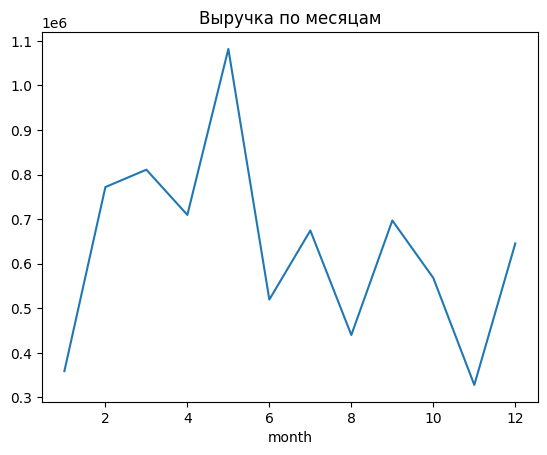

In [42]:
"""Задания:
Найдите общую выручку по каждой категории товаров
Определите самый популярный товар (по количеству проданных единиц)
Посчитайте средний чек заказа (общая выручка / количество заказов)
Проанализируйте сезонность продаж по месяцам"""

#Найдите общую выручку по каждой категории товаров
cat_revenue = sales_df.groupby('category')['revenue'].sum()
print(f' Общая выручка по каждой категории\n{cat_revenue}')

#Определите самый популярный товар (по количеству проданных единиц)
top_product = sales_df.groupby('product')['quantity'].sum().idxmax()
print(f'Самый продаваемый товар:{top_product}')
outsider_product = sales_df.groupby('product')['quantity'].sum().idxmin()
print(f'Самый плохо продаваемый товар:{outsider_product}')

#Посчитайте средний чек заказа (общая выручка / количество заказов)
sales_df['avg_revenue'] = sales_df['revenue'] / sales_df['quantity']
avg_revenue_total = (sales_df['revenue'].sum() / sales_df['sale_id'].nunique()).round(2)
print(f'Средний чек по всей выручке и всем заказам: {avg_revenue_total}')

#Проанализируйте сезонность продаж по месяцам
sales_df['month'] = sales_df['date'].dt.month
monthly_sales = sales_df.groupby('month')['revenue'].sum()
print(f'Сезонность продаж\n{monthly_sales}')
monthly_sales.plot(kind='line', title='Выручка по месяцам')

In [43]:
#Задача 2: Анализ пользовательской активности
# Создаем данные о пользовательской активности
users = [f'user_{i}' for i in range(1, 51)]
actions = ['login', 'view_product', 'add_to_cart', 'purchase', 'logout']

activity_data = []
for i in range(1000):
    user = random.choice(users)
    action = random.choice(actions)
    activity_data.append({
        'user_id': user,
        'action': action,
        'timestamp': datetime(2023, 6, random.randint(1, 30),
                             random.randint(0, 23), random.randint(0, 59)),
        'duration': random.randint(1, 300) if action != 'purchase' else 0
    })

activity_df = pd.DataFrame(activity_data)
print("Данные о пользовательской активности:")
print(activity_df.head(10))

Данные о пользовательской активности:
   user_id        action           timestamp  duration
0  user_23  view_product 2023-06-21 02:49:00        21
1  user_49         login 2023-06-08 06:53:00        11
2  user_40  view_product 2023-06-08 04:30:00        59
3  user_37  view_product 2023-06-15 22:16:00       189
4  user_11        logout 2023-06-20 23:45:00        59
5  user_50  view_product 2023-06-10 03:37:00        14
6  user_20        logout 2023-06-22 12:25:00       102
7   user_5        logout 2023-06-23 20:15:00        53
8  user_45   add_to_cart 2023-06-28 21:38:00        62
9  user_37         login 2023-06-12 17:27:00       190


In [44]:
"""Задания:
Найдите самых активных пользователей (по количеству действий)
Определите наиболее популярные действия
Посчитайте среднюю продолжительность сессии для каждого пользователя
Найдите пиковое время активности (час дня с наибольшим количеством действий)"""

#Найдите самых активных пользователей (по количеству действий)
active_users = activity_df.groupby('user_id')['action'].count().sort_values(ascending=False)
print(f'Топ-5 активных юзеров {active_users.head(5)}')

#Определите наиболее популярные действия
pop_actions = activity_df['action'].value_counts().sort_values(ascending=False)
print(f'Самые популярные действия: {pop_actions}')

#Посчитайте среднюю продолжительность сессии для каждого пользователя
session_duration = activity_df.groupby('user_id')['duration'].mean().sort_values(ascending=False)
print(f'Средняя продолжительность сессии для каждого пользователя\n {session_duration}')

#Найдите пиковое время активности (час дня с наибольшим количеством действий)
activity_df['hours'] = activity_df['timestamp'].dt.hour
peak_hour = activity_df['hours'].value_counts().idxmax()
print(f'Самый пиковый час активности: {peak_hour}')

Топ-5 активных юзеров user_id
user_24    27
user_16    26
user_6     26
user_33    26
user_22    25
Name: action, dtype: int64
Самые популярные действия: action
logout          219
purchase        206
add_to_cart     200
view_product    192
login           183
Name: count, dtype: int64
Средняя продолжительность сессии для каждого пользователя
 user_id
user_7     151.652174
user_19    147.375000
user_30    140.541667
user_46    139.920000
user_33    139.846154
user_3     136.260870
user_14    136.000000
user_13    134.117647
user_40    133.533333
user_17    133.500000
user_22    132.720000
user_41    132.047619
user_42    131.695652
user_44    131.238095
user_24    131.000000
user_21    129.714286
user_36    129.680000
user_5     129.500000
user_12    128.000000
user_2     127.100000
user_9     126.473684
user_37    126.320000
user_29    125.600000
user_31    124.363636
user_27    124.240000
user_48    123.062500
user_47    122.695652
user_39    121.157895
user_45    119.894737
user_32 

In [45]:
#Задача 3: Анализ рекламных кампаний
# Создаем данные о рекламных кампаниях
campaigns = [f'campaign_{i}' for i in range(1, 6)]
channels = ['Google Ads', 'Facebook', 'Instagram', 'Email', 'YouTube']

campaign_data = []
for i in range(100):
    campaign = random.choice(campaigns)
    channel = random.choice(channels)
    campaign_data.append({
        'campaign_id': campaign,
        'channel': channel,
        'clicks': random.randint(100, 1000),
        'conversions': random.randint(10, 100),
        'cost': random.randint(500, 5000),
        'date': datetime(2023, random.randint(1, 12), random.randint(1, 28))
    })

campaign_df = pd.DataFrame(campaign_data)
campaign_df['cpc'] = campaign_df['cost'] / campaign_df['clicks']  # cost per click
campaign_df['conversion_rate'] = campaign_df['conversions'] / campaign_df['clicks'] * 100

print("Данные о рекламных кампаниях:")
print(campaign_df.head())

Данные о рекламных кампаниях:
  campaign_id     channel  clicks  conversions  cost       date        cpc  \
0  campaign_3  Google Ads     532           90  2462 2023-09-25   4.627820   
1  campaign_5   Instagram     391           93  4857 2023-05-14  12.421995   
2  campaign_2  Google Ads     286           27  2872 2023-02-21  10.041958   
3  campaign_4     YouTube     563           44  4530 2023-04-11   8.046181   
4  campaign_1    Facebook     150           78   681 2023-03-04   4.540000   

   conversion_rate  
0        16.917293  
1        23.785166  
2         9.440559  
3         7.815275  
4        52.000000  


Средняя конверсия по каналам (топ-5)
 channel
Facebook      15.958455
Google Ads    14.603443
Instagram     14.588909
Email         10.788576
YouTube        8.722472
Name: conversion_rate, dtype: float64
Кампания с наименьшей стоимостью за клик: campaign_1
Общая стоимость и количество конверсий для каждой кампании
               cost  conversions
campaign_id                    
campaign_1   38144          731
campaign_2   75205         1283
campaign_3   32652         1002
campaign_4   57245         1070
campaign_5   76511         1257
campaign_id                object
channel                    object
clicks                      int64
conversions                 int64
cost                        int64
date               datetime64[ns]
cpc                       float64
conversion_rate           float64
dtype: object
Эффективность кампаний по месяцам
campaign_id  campaign_1  campaign_2  campaign_3  campaign_4  campaign_5
month                                                              

<Axes: xlabel='month'>

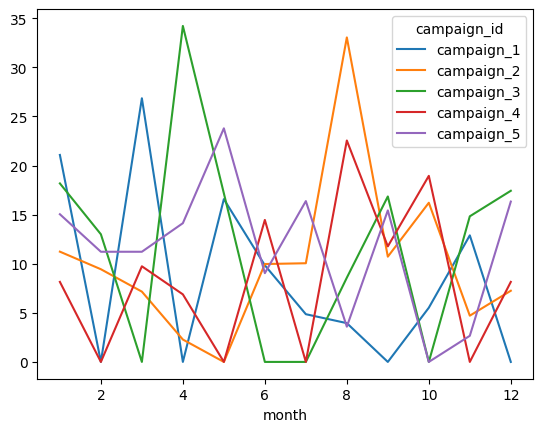

In [46]:
"""Задания:
Найдите самый эффективный канал по конверсии (conversion rate)
Определите кампанию с наименьшей стоимостью за клик (CPC)
Посчитайте общую стоимость и количество конверсий для каждой кампании
Проанализируйте эффективность кампаний по месяцам"""

#Найдите самый эффективный канал по конверсии (conversion rate)
channel_conversion = campaign_df.groupby('channel')['conversion_rate'].mean().sort_values(ascending=False)
print(f'Средняя конверсия по каналам (топ-5)\n {channel_conversion.head(5)}')

#Определите кампанию с наименьшей стоимостью за клик (CPC)
min_cpc_company = campaign_df.groupby('campaign_id')['cpc'].mean().idxmin()
print(f'Кампания с наименьшей стоимостью за клик: {min_cpc_company}')

#Посчитайте общую стоимость и количество конверсий для каждой кампании
camp_stats = campaign_df.groupby('campaign_id').agg({'cost':'sum', 'conversions': 'sum'})
print(f'Общая стоимость и количество конверсий для каждой кампании\n {camp_stats}')

#Проанализируйте эффективность кампаний по месяцам
print(campaign_df.dtypes) #Смотрим тип колонки date
campaign_df['month'] = campaign_df['date'].dt.month
monthly_stats = (campaign_df.groupby(['month', 'campaign_id'])['conversion_rate'].mean().unstack().fillna(0)).round(2)
print(f'Эффективность кампаний по месяцам\n{monthly_stats}')
monthly_stats.plot()

In [48]:
#Задача 4: Анализ оттока клиентов
# Создаем данные об оттоке клиентов
churn_data = []
for i in range(1, 101):
    tenure = random.randint(1, 36)  # срок обслуживания в месяцах
    monthly_charge = random.randint(500, 5000)
    total_charges = tenure * monthly_charge

    churn_data.append({
        'customer_id': f'cust_{i}',
        'tenure': tenure,
        'monthly_charge': monthly_charge,
        'total_charges': total_charges,
        'churn': random.choice([0, 1]),  # 0 - остался, 1 - ушел
        'support_calls': random.randint(0, 10),
        'last_login_days': random.randint(1, 90)
    })

churn_df = pd.DataFrame(churn_data)
print("Данные об оттоке клиентов:")
print(churn_df.head())

Данные об оттоке клиентов:
  customer_id  tenure  monthly_charge  total_charges  churn  support_calls  \
0      cust_1      24             774          18576      0              9   
1      cust_2      24            1427          34248      1              1   
2      cust_3      34            2789          94826      1              8   
3      cust_4      34            1224          41616      0              7   
4      cust_5       5            4917          24585      1              9   

   last_login_days  
0               62  
1               19  
2               11  
3               81  
4                7  


In [49]:
"""Задания:
Определите процент оттока клиентов
Проанализируйте, как срок обслуживания (tenure) влияет на отток
Найдите среднее количество обращений в поддержку для ушедших и оставшихся клиентов
Создайте категории клиентов по размеру ежемесячного платежа и проанализируйте отток в каждой категории"""

#Определите процент оттока клиентов
churn_rate = 100.0 * (churn_df.loc[churn_df['churn'] == 1,'churn'].count() / ((churn_df['churn']).count()))
print(f'Процент оттока клиентов: {churn_rate}%')

#Проанализируйте, как срок обслуживания (tenure) влияет на отток
churn_tenure_corr = churn_df['tenure'].corr(churn_df['churn'], method='spearman')
print(f'Коэффициент корреляции обслуживания и оттока = {churn_tenure_corr.round(3)}')
churn_tenure_stats = churn_df.groupby('churn')['tenure'].mean().round(1)
leaved_clients = churn_tenure_stats[1]
stayed_clients = churn_tenure_stats[0]
print(f'Средний срок обслуживания ушедших клиентов: {leaved_clients}')
print(f'Средний срок обслуживания оставшихся клиентов: {stayed_clients}')

#Найдите среднее количество обращений в поддержку для ушедших и оставшихся клиентов
churn_calls = churn_df.groupby('churn')['support_calls'].mean().round(0)
leaved_clients_calls = churn_calls[1]
stayed_clients_calls = churn_calls[0]
print(f'Среднее количество звонков ушедших клиентов: {leaved_clients_calls}')
print(f'Среднее количество звонков оставшихся клиентов: {stayed_clients_calls}')

#Создайте категории клиентов по размеру ежемесячного платежа и проанализируйте отток в каждой категории
churn_df['charge_category'] = pd.cut(churn_df['monthly_charge'], bins=3, labels=['Низкий','Средний', 'Высокий'])
churn_by_charge = (churn_df.groupby('charge_category')['churn'].mean()*100).round(2)
print(f'Отток по категориям взносов (в %)\n{churn_by_charge}')

Процент оттока клиентов: 51.0%
Коэффициент корреляции обслуживания и оттока = -0.06
Средний срок обслуживания ушедших клиентов: 16.7
Средний срок обслуживания оставшихся клиентов: 17.7
Среднее количество звонков ушедших клиентов: 5.0
Среднее количество звонков оставшихся клиентов: 6.0


C:\Users\stacy\AppData\Local\Temp\ipykernel_13728\3650443964.py:29: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_by_charge = (churn_df.groupby('charge_category')['churn'].mean()*100).round(2)


Отток по категориям взносов (в %)
charge_category
Низкий     58.82
Средний    40.00
Высокий    54.84
Name: churn, dtype: float64


In [34]:
#Задача 5
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

# Создаем данные о студентах и их прогрессе в онлайн-курсах
np.random.seed(42)
courses = ['Python для начинающих', 'Анализ данных с Pandas', 'Машинное обучение', 'Веб-разработка на Django']
students = [f'student_{i}' for i in range(1, 101)]

enrollment_data = []
for i in range(300):
    student = np.random.choice(students)
    course = np.random.choice(courses)
    enroll_date = datetime(2023, 1, 1) + timedelta(days=np.random.randint(0, 180))
    completion_date = enroll_date + timedelta(days=np.random.randint(10, 90)) if np.random.random() > 0.4 else None
    score = np.random.randint(60, 100) if completion_date else None

    enrollment_data.append({
        'student_id': student,
        'course': course,
        'enroll_date': enroll_date,
        'completion_date': completion_date,
        'score': score
    })

courses_df = pd.DataFrame(enrollment_data)
print("Данные о курсах:")
print(courses_df.head())

Данные о курсах:
   student_id                    course enroll_date completion_date  score
0  student_52     Python для начинающих  2023-01-15      2023-03-26   80.0
1  student_83         Машинное обучение  2023-03-16      2023-04-18   62.0
2  student_22     Python для начинающих  2023-01-02      2023-02-10   97.0
3   student_2  Веб-разработка на Django  2023-01-21      2023-03-29   81.0
4  student_89     Python для начинающих  2023-02-28             NaT    NaN


Количество записей на каждый курс:
course
Python для начинающих       94
Веб-разработка на Django    81
Анализ данных с Pandas      64
Машинное обучение           61
Name: count, dtype: int64
course
Python для начинающих       56
Анализ данных с Pandas      33
Веб-разработка на Django    58
Машинное обучение           37
Name: completion_date, dtype: int64
Процент завершения для каждого курса
course
Python для начинающих       59.57
Анализ данных с Pandas      51.56
Веб-разработка на Django    71.60
Машинное обучение           60.66
dtype: float64
Средний балл по курсам среди завершивших курс
                          completion_date  score
course                                          
Python для начинающих                  56  82.50
Анализ данных с Pandas                 33  82.61
Веб-разработка на Django               58  78.12
Машинное обучение                      37  80.51


<Axes: title={'center': 'Динамика записей по месяцам'}, xlabel='enroll_month'>

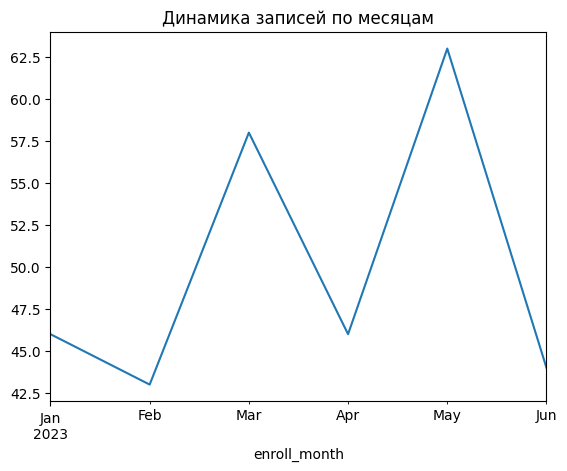

In [37]:
"""Задания:
1. Посчитайте количество записей на каждый курс.
2. Определите процент завершения для каждого курса (доля студентов, у которых есть completion_date).
3. Найдите средний балл для каждого курса (только среди завершивших).
4. Проанализируйте динамику записей по месяцам (постройте временной ряд по enroll_date)."""

# Задача 1. Посчитайте количество записей на каждый курс
count_of_registrations = courses_df['course'].value_counts()
print(f'Количество записей на каждый курс:\n{count_of_registrations}')

# Задача 2. Определите процент завершения для каждого курса (доля студентов, у которых есть completion_date)
count_students_with_completion_date = courses_df.groupby('course')['completion_date'].count()
print(count_students_with_completion_date)

count_students_with_no_completion_date = count_of_registrations -  count_students_with_completion_date
percentage_of_compete_course = count_students_with_completion_date*100/count_of_registrations
print(f'Процент завершения для каждого курса\n{percentage_of_compete_course.round(2)}')

# Задача 3. Найдите средний балл для каждого курса (только среди завершивших)
avg_score_in_courses = courses_df.groupby('course')[['completion_date', 'score']].agg({'completion_date':'count','score':'mean'}).round(2)
print(f'Средний балл по курсам среди завершивших курс\n{avg_score_in_courses}')

# Задача 4. Проанализируйте динамику записей по месяцам (постройте временной ряд по enroll_date)
# courses_df['enroll_month']=courses_df['enroll_date'].dt.month

# Сначала создаем колонку с месяцем
courses_df['enroll_month'] = courses_df['enroll_date'].dt.to_period('M')
# Группируем по месяцам и считаем количество записей
monthly_dynamic = courses_df.groupby('enroll_month').size()
# Строим график
monthly_dynamic.plot(kind='line', title='Динамика записей по месяцам')

In [29]:
# Задача 6
# Создаем данные о банковских транзакциях
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

np.random.seed(123)
customers = [f'cust_{i}' for i in range(1, 51)]
transaction_types = ['deposit', 'withdrawal', 'transfer']

transactions_data = []
for i in range(1000):
    customer = np.random.choice(customers)
    t_type = np.random.choice(transaction_types)
    amount = np.random.randint(100, 10000) if t_type != 'transfer' else np.random.randint(500, 5000)
    fee = amount * 0.01 if t_type == 'transfer' else 0

    transactions_data.append({
        'transaction_id': i + 1,
        'customer_id': customer,
        'type': t_type,
        'amount': amount,
        'fee': fee,
        'timestamp': datetime(2023, np.random.randint(1, 13), np.random.randint(1, 29))
    })

transactions_df = pd.DataFrame(transactions_data)
print("Данные о транзакциях:")
print(transactions_df.head())

Данные о транзакциях:
   transaction_id customer_id        type  amount    fee  timestamp
0               1     cust_46    transfer    1846  18.46 2023-03-07
1               2     cust_18    transfer    2093  20.93 2023-07-02
2               3     cust_33  withdrawal    6882   0.00 2023-10-01
3               4     cust_47     deposit     211   0.00 2023-10-20
4               5     cust_15  withdrawal    1192   0.00 2023-02-24


In [33]:
"""Задания:
1. Посчитайте общую сумму транзакций по каждому типу.
2. Найдите топ-5 клиентов по объему транзакций (сумма amount).
3. Определите месяц с наибольшим количеством транзакций.
4. Посчитайте общую сумму комиссий за переводы (fee) для каждого клиента."""

# Посчитайте общую сумму транзакций по каждому типу.
sum_by_type = transactions_df.groupby('type')['amount'].sum()
print(f'Общая сумма транзакций по каждому типу:\n{sum_by_type}')

#Найдите топ-5 клиентов по объему транзакций (сумма amount).
top_5 = transactions_df.groupby('customer_id')['amount'].sum().sort_values(ascending=False).head(5)
print(f'Топ-5 клиентов по объему транзакций\n{top_5}')

#Определите месяц с наибольшим количеством транзакций
transactions_df['month'] = transactions_df['timestamp'].dt.month
print(transactions_df)

month = {1 : 'Январь', 2 : 'Февраль', 3 :  'Март', 4 : 'Апрель', 5 : 'Май', 6 : 'Июнь', 7 : 'Июль', 8 : 'Август', 9 : 'Сентябрь', 10 : 'Октябрь', 11 : 'Ноябрь', 12 : 'Декабрь'}


transactions_df['month_word'] = transactions_df['month'].apply(lambda x: month[x])
# print(transactions_df)

# transactions_df['month_words'] = transactions_df['month'].apply(lambda x: month_in_words(x))
# transactions_df

# def searchMonth(month_str: str):
#     for kv in month.items():
#         if kv[1] == month_str:
#             return kv[0]
#     return None
#
# def ivert_values(list_of_str) ->list:
#     return list_of_str.map(lambda x: searchMonth(x))


top_month = transactions_df.groupby('month')['transaction_id'].count().idxmax()
top_month_words = transactions_df.groupby('month_word')['transaction_id'].count().idxmax()
print(f'Месяц с наибольшим количеством транзакций:\n{top_month_words}')

# Посчитайте общую сумму комиссий за переводы (fee) для каждого клиента
total_fee_by_customers = transactions_df.groupby('customer_id')['fee'].sum().sort_values(ascending=False)
print(f'Общая сумма комиссий за переводы для каждого клиента\n{total_fee_by_customers}')

Общая сумма транзакций по каждому типу:
type
deposit       1655880
transfer       977767
withdrawal    1559936
Name: amount, dtype: int64
Топ-5 клиентов по объему транзакций
customer_id
cust_30    134420
cust_25    123863
cust_50    123669
cust_48    123161
cust_11    120134
Name: amount, dtype: int64
     transaction_id customer_id        type  amount    fee  timestamp  month  \
0                 1     cust_46    transfer    1846  18.46 2023-03-07      3   
1                 2     cust_18    transfer    2093  20.93 2023-07-02      7   
2                 3     cust_33  withdrawal    6882   0.00 2023-10-01     10   
3                 4     cust_47     deposit     211   0.00 2023-10-20     10   
4                 5     cust_15  withdrawal    1192   0.00 2023-02-24      2   
..              ...         ...         ...     ...    ...        ...    ...   
995             996     cust_47    transfer    4997  49.97 2023-04-20      4   
996             997     cust_19     deposit    7859   0.0

In [31]:
# Задача 7: Анализ заказов в ресторане доставки
# Создаем данные о заказах в ресторане
np.random.seed(456)
dishes = ['Пицца Маргарита', 'Паста Карбонара', 'Салат Цезарь', 'Бургер', 'Суши', 'Роллы']
categories = ['Итальянская', 'Итальянская', 'Салаты', 'Фастфуд', 'Японская', 'Японская']

orders_data = []
for i in range(500):
    dish_idx = np.random.randint(0, len(dishes))
    order_time = datetime(2023, np.random.randint(1, 13), np.random.randint(1, 29),
                         np.random.randint(10, 23), np.random.randint(0, 60))

    orders_data.append({
        'order_id': i + 1,
        'dish': dishes[dish_idx],
        'category': categories[dish_idx],
        'price': np.random.randint(300, 1500),
        'quantity': np.random.randint(1, 4),
        'order_time': order_time
    })

orders_df = pd.DataFrame(orders_data)
orders_df['total'] = orders_df['price'] * orders_df['quantity']
print("Данные о заказах:")
print(orders_df.head())

Данные о заказах:
   order_id             dish     category  price  quantity  \
0         1           Бургер      Фастфуд    795         1   
1         2     Салат Цезарь       Салаты    520         2   
2         3           Бургер      Фастфуд    506         1   
3         4     Салат Цезарь       Салаты    618         3   
4         5  Пицца Маргарита  Итальянская    335         3   

           order_time  total  
0 2023-06-12 19:42:00    795  
1 2023-05-14 22:45:00   1040  
2 2023-09-20 15:34:00    506  
3 2023-03-12 18:04:00   1854  
4 2023-10-11 18:44:00   1005  


In [57]:
"""Задания:
1. Найдите самое популярное блюдо (по количеству заказов).
2. Определите категорию с наибольшей выручкой.
3. Проанализируйте распределение заказов по времени суток (утро, день, вечер, ночь).
4. Посчитайте средний чек заказа (общая выручка / количество уникальных заказов)."""

# Найдите самое популярное блюдо (по количеству заказов)
top_dish = orders_df['dish'].value_counts().sort_values(ascending=False).head(1)
print(f'самое популярное блюдо:\n{top_dish}')

# Определите категорию с наибольшей выручкой
orders_df['revenue']= orders_df['price'] * orders_df['quantity']
top_category = orders_df.groupby('category')['revenue'].sum().sort_values(ascending=False).head(1)
print(f'Категория с наибольшей выручкой:\n{top_category}')

# Проанализируйте распределение заказов по времени суток (утро, день, вечер, ночь)
orders_df['hour_of_order'] = orders_df['order_time'].dt.hour
orders_df['time_of_day'] = pd.cut(orders_df['hour_of_order'], bins = [0, 4, 12, 17, 23], labels = ['Ночь', 'Утро', 'День', 'Вечер'])
orders_by_time_of_day = orders_df.groupby('time_of_day')['order_id'].count()
print(f'Распределение заказов по времени суток:\n{orders_by_time_of_day}')

#Посчитайте средний чек заказа (общая выручка / количество уникальных заказов)
avg_amount = orders_df['revenue'].sum()/orders_df['order_id'].nunique()
print(f'Средний чек: {avg_amount}')

самое популярное блюдо:
dish
Роллы    97
Name: count, dtype: int64
Категория с наибольшей выручкой:
category
Японская    307807
Name: revenue, dtype: int64
Распределение заказов по времени суток:
time_of_day
Ночь       0
Утро     132
День     165
Вечер    203
Name: order_id, dtype: int64
Средний чек: 1737.106


C:\Users\stacy\AppData\Local\Temp\ipykernel_7412\3201140364.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  orders_by_time_of_day = orders_df.groupby('time_of_day')['order_id'].count()


In [6]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
# Задача 8: Анализ продаж в книжном магазине
# Создаем данные о продажах книг
np.random.seed(789)
genres = ['Фантастика', 'Детектив', 'Роман', 'Наука', 'История']
authors = [f'Author_{i}' for i in range(1, 21)]

books_data = []
for i in range(200):
    genre = np.random.choice(genres)
    author = np.random.choice(authors)

    books_data.append({
        'sale_id': i + 1,
        'title': f'Book_{i+1}',
        'author': author,
        'genre': genre,
        'price': np.random.randint(200, 800),
        'quantity': np.random.randint(1, 5),
        'sale_date': datetime(2023, np.random.randint(1, 13), np.random.randint(1, 29))
    })

books_df = pd.DataFrame(books_data)
books_df['revenue'] = books_df['price'] * books_df['quantity']
print("Данные о продажах книг:")
print(books_df.head())

Данные о продажах книг:
   sale_id   title     author       genre  price  quantity  sale_date  revenue
0        1  Book_1  Author_15       Наука    614         3 2023-02-13     1842
1        2  Book_2   Author_4       Роман    220         1 2023-12-21      220
2        3  Book_3   Author_9    Детектив    600         2 2023-02-26     1200
3        4  Book_4  Author_16  Фантастика    332         2 2023-05-18      664
4        5  Book_5   Author_2       Наука    636         2 2023-07-15     1272


In [27]:
"""Задания:
Определите самый популярный жанр (по количеству проданных книг).
Найдите автора с наибольшей выручкой.
Проанализируйте сезонность продаж по жанрам (какие жанры лучше продаются в разные месяцы).
Посчитайте среднюю цену книги для каждого жанра"""

# Определите самый популярный жанр (по количеству проданных книг)
top_genre = books_df['genre'].value_counts().sort_values(ascending=False).head(1)
print(f'Самый популярный жанр:\n{top_genre}')

# Найдите автора с наибольшей выручкой
top_author = books_df.groupby('author')['revenue'].sum().sort_values(ascending=False).head(1)
print(f'автора с наибольшей выручкой\n{top_author}')

#Проанализируйте сезонность продаж по жанрам (какие жанры лучше продаются в разные месяцы)
books_df['month_sales'] = books_df['sale_date'].dt.month
seasons_os_sales = books_df.groupby(['month_sales', 'genre'])['quantity'].sum().unstack().fillna(0)
print(f'Сезонность продаж\n{seasons_os_sales}')

#Посчитайте среднюю цену книги для каждого жанра
avg_price_by_genre = books_df.groupby('genre').agg({'price': 'mean'}).rename(columns = {'price': 'avg_price'}).sort_values(by = 'avg_price', ascending=False).round(2)
print(f'Средняя цена книг по жанрам\n{avg_price_by_genre}')

Самый популярный жанр:
genre
Наука    46
Name: count, dtype: int64
автора с наибольшей выручкой
author
Author_7    19397
Name: revenue, dtype: int64
Сезонность продаж
genre        Детектив  История  Наука  Роман  Фантастика
month_sales                                             
1                15.0      9.0    4.0    5.0         4.0
2                 5.0      4.0   24.0    3.0        10.0
3                13.0      8.0   13.0   14.0        10.0
4                 8.0      8.0    3.0   11.0         7.0
5                 8.0      4.0   11.0   14.0        14.0
6                 5.0      6.0    1.0    8.0         4.0
7                 7.0      8.0   14.0    0.0        11.0
8                11.0      6.0    6.0   12.0         9.0
9                 4.0     17.0    9.0    7.0         7.0
10                8.0      7.0   22.0    8.0         4.0
11                2.0     11.0    8.0    3.0        12.0
12               11.0      1.0   11.0    5.0         9.0
Средняя цена книг по жанрам
       

In [38]:
# Задача 9: Анализ эффективности сотрудников в колл-центре
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

# Создаем данные о работе операторов колл-центра
np.random.seed(555)
operators = [f'operator_{i}' for i in range(1, 21)]
call_types = ['входящий', 'исходящий', 'консультация', 'жалоба', 'продажа']

calls_data = []
for i in range(1000):
    operator = np.random.choice(operators)
    call_type = np.random.choice(call_types)
    duration = np.random.randint(2, 30)  # длительность в минутах
    satisfaction = np.random.randint(1, 6) if call_type != 'жалоба' else np.random.randint(1, 4)
    sale_amount = np.random.randint(0, 10000) if call_type == 'продажа' else 0

    calls_data.append({
        'call_id': i + 1,
        'operator': operator,
        'call_type': call_type,
        'duration': duration,
        'satisfaction': satisfaction,  # оценка удовлетворенности от 1 до 5
        'sale_amount': sale_amount,
        'call_date': datetime(2023, np.random.randint(1, 13), np.random.randint(1, 29))
    })

calls_df = pd.DataFrame(calls_data)
print("Данные о звонках в колл-центре:")
print(calls_df.head(10))

Данные о звонках в колл-центре:
   call_id     operator     call_type  duration  satisfaction  sale_amount  \
0        1  operator_15     исходящий         3             5            0   
1        2  operator_10      входящий        23             1            0   
2        3  operator_11        жалоба        28             1            0   
3        4  operator_11  консультация        11             5            0   
4        5  operator_20        жалоба        21             1            0   
5        6  operator_20     исходящий         6             2            0   
6        7   operator_9       продажа        29             1         3441   
7        8  operator_12      входящий        17             1            0   
8        9  operator_18      входящий        15             4            0   
9       10   operator_3  консультация        19             1            0   

   call_date  
0 2023-07-23  
1 2023-05-23  
2 2023-05-02  
3 2023-04-14  
4 2023-08-25  
5 2023-02-02  
6 20

In [130]:
"""Задания:
Посчитайте общее количество звонков и среднюю длительность разговора для каждого оператора.
Определите рейтинг операторов по среднему показателю удовлетворенности клиентов.
Найдите самых эффективных операторов по продажам (сумма продаж / количество звонков).
Проанализируйте распределение типов звонков по времени суток (утро, день, вечер).
Ранжирование: Создайте комплексный рейтинг операторов, учитывающий:
Среднюю удовлетворенность (40% веса)
Эффективность продаж (30% веса)
Общее количество обработанных звонков (30% веса)"""

# Посчитайте общее количество звонков и среднюю длительность разговора для каждого оператора
operator_stats = calls_df.groupby('operator').agg({'call_id':'count', 'duration':'mean'}).round(2).rename(columns = {'call_id':'amount_of_calls', 'duration':'avg_duration'})
print(operator_stats)

# Определите рейтинг операторов по среднему показателю удовлетворенности клиентов
operator_rating = calls_df.groupby('operator').agg({'satisfaction':'mean'}).rename({'satisfaction':'satisfaction'}).round(3)
operator_rating['rank'] = operator_rating['satisfaction'].rank(method='dense', ascending=False)
operator_rating.sort_values(by='rank', ascending=True)
print(f'Рейтинг операторов по удовлетворению клиентов\n{operator_rating.sort_values(by='rank', ascending=True)}')

# Найдите самых эффективных операторов по продажам (сумма продаж / количество звонков)
operator_and_sales =calls_df[calls_df['call_type']  == 'продажа'] #Создаем новый дф только с продажами
# effectivity = operator_and_sales.groupby('operator').agg({'sale_amount':'sum'}).rename(columns={'sale_amount':'total_amount'}).sort_values(by='operator', ascending=True)
# operators_call_count = operator_and_sales.groupby('operator').agg({'call_id':'count'}).rename(columns={'call_id':'call_count'}).sort_values(by='operator', ascending=True)
# operator_ratings['effect'] = (effectivity['total_amount']/operators_call_count['call_count']).round(2)
# operator_ratings['rank'] = operator_ratings['effect'].rank(method='dense', ascending=False)
# print(operator_ratings)
effectivity = operator_and_sales.groupby('operator').agg(total_sales=('sale_amount', 'sum'), call_count=('call_id', 'count'))
effectivity['effect'] = effectivity['total_sales'] / effectivity['call_count']
# Для всех операторов
sales_effectiveness = calls_df.groupby('operator').apply(
    lambda x: x['sale_amount'].sum() / x['call_id'].count() if x['call_id'].count() > 0 else 0
).round(2)

# Проанализируйте распределение типов звонков по времени суток (утро, день, вечер)
#Выполнить задание нельзя, так как нет данных о времени звонков, есть только даты

"""Ранжирование: Создайте комплексный рейтинг операторов, учитывающий:
Среднюю удовлетворенность (40% веса)
Эффективность продаж (30% веса)
Общее количество обработанных звонков (30% веса)"""

# Собираем все метрики
metrics_df = pd.DataFrame({
    'satisfaction': calls_df.groupby('operator')['satisfaction'].mean(),
    'sales_effectiveness': calls_df.groupby('operator').apply(
        lambda x: x['sale_amount'].sum() / x['call_id'].count() if x['call_id'].count() > 0 else 0
    ),
    'call_count': calls_df.groupby('operator')['call_id'].count()
})

# Нормализуем метрики (приводим к шкале 0-1)
metrics_df['satisfaction_norm'] = metrics_df['satisfaction'] / metrics_df['satisfaction'].max()
metrics_df['sales_norm'] = metrics_df['sales_effectiveness'] / metrics_df['sales_effectiveness'].max()
metrics_df['calls_norm'] = metrics_df['call_count'] / metrics_df['call_count'].max()

# Рассчитываем комплексный рейтинг
metrics_df['composite_score'] = (0.4 * metrics_df['satisfaction_norm'] +
                                 0.3 * metrics_df['sales_norm'] +
                                 0.3 * metrics_df['calls_norm'])

# Ранжируем
metrics_df['composite_rank'] = metrics_df['composite_score'].rank(ascending=False)



             amount_of_calls  avg_duration
operator                                  
operator_1                47         16.83
operator_10               39         15.10
operator_11               59         16.15
operator_12               47         17.70
operator_13               54         14.98
operator_14               39         16.74
operator_15               59         13.64
operator_16               55         16.38
operator_17               50         15.48
operator_18               57         17.07
operator_19               53         16.26
operator_2                45         15.31
operator_20               57         14.88
operator_3                53         15.25
operator_4                57         15.30
operator_5                50         14.94
operator_6                59         14.53
operator_7                46         16.70
operator_8                32         16.28
operator_9                42         16.55
Рейтинг операторов по удовлетворению клиентов
        

C:\Users\stacy\AppData\Local\Temp\ipykernel_19448\1226342278.py:31: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sales_effectiveness = calls_df.groupby('operator').apply(


'Ранжирование: Создайте комплексный рейтинг операторов, учитывающий:\nСреднюю удовлетворенность (40% веса)\nЭффективность продаж (30% веса)\nОбщее количество обработанных звонков (30% веса)'

In [122]:
# Задача 10: Анализ производительности интернет-магазина
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

# Создаем данные о производительности интернет-магазина
np.random.seed(777)
products = [f'product_{i}' for i in range(1, 51)]
categories = ['электроника', 'одежда', 'дом', 'книги', 'спорт']
regions = ['Москва', 'СПб', 'Новосибирск', 'Екатеринбург', 'Казань', 'Другие']

performance_data = []
for i in range(500):
    product = np.random.choice(products)
    category = np.random.choice(categories)
    region = np.random.choice(regions)
    sessions = np.random.randint(50, 1000)
    conversion_rate = np.random.uniform(0.01, 0.05)
    revenue = sessions * conversion_rate * np.random.randint(500, 5000)
    returns = np.random.randint(0, int(revenue * 0.1))

    performance_data.append({
        'record_id': i + 1,
        'product': product,
        'category': category,
        'region': region,
        'sessions': sessions,
        'conversion_rate': conversion_rate,
        'revenue': revenue,
        'returns': returns,
        'date': datetime(2023, np.random.randint(1, 13), np.random.randint(1, 29))
    })

performance_df = pd.DataFrame(performance_data)
performance_df['net_revenue'] = performance_df['revenue'] - performance_df['returns']
print("Данные о производительности интернет-магазина:")
print(performance_df.head(10))

Данные о производительности интернет-магазина:
   record_id     product     category        region  sessions  \
0          1  product_40        книги           СПб       121   
1          2  product_40          дом        Другие       704   
2          3   product_8       одежда  Екатеринбург       153   
3          4   product_3          дом        Казань       833   
4          5  product_46        книги        Казань       221   
5          6  product_29  электроника        Другие       275   
6          7  product_42        спорт        Другие        66   
7          8  product_26        спорт           СПб       314   
8          9  product_32        книги  Екатеринбург       175   
9         10  product_24       одежда  Екатеринбург       249   

   conversion_rate       revenue  returns       date   net_revenue  
0         0.019922  11358.788597      985 2023-11-25  10373.788597  
1         0.023889  48249.751373     2898 2023-05-06  45351.751373  
2         0.035059   4639.8738

In [129]:
"""Задания:
1. Определите топ-5 продуктов по чистой выручке (net_revenue).
2. Проанализируйте конверсию по категориям товаров.
3. Найдите регионы с наибольшим количеством сессий и самый прибыльный регион.
4. Посчитайте уровень возвратов (returns / revenue) для каждого продукта.
5. Ранжирование: Создайте рейтинг продуктов по комплексному показателю эффективности, который учитывает:
Чистую выручку (ранг 1 - самый высокий)
Конверсию (ранг 2 - самый высокий)
Уровень возвратов (ранг 3 - самый низкий)
Общий ранг = (Ранг 1 + Ранг 2 + Ранг 3) / 3"""

# Определите топ-5 продуктов по чистой выручке (net_revenue)
top_5_products = performance_df.groupby('product')['net_revenue'].sum().sort_values(ascending=False).round(2).head(5)
print(top_5_products)

# Проанализируйте конверсию по категориям товаров
conversion_stats = performance_df.groupby('category')['conversion_rate'].mean().sort_values(ascending=False)
print(conversion_stats)

# Найдите регионы с наибольшим количеством сессий и самый прибыльный регион
regions_stats = performance_df.groupby('region').agg({'sessions':'sum', 'revenue':'sum'}).rename(columns={'sessions':'total_sessions', 'revenue':'total_revenue'})
# top_region_ = regions_stats.sort_values(by='total_revenue', ascending=False).head(1)
top_region_by_revenue = regions_stats['total_revenue'].idxmax()
print(top_region_by_revenue)
top_region_by_sessions = regions_stats['total_sessions'].idmax()
print(top_region_by_sessions)

# Посчитайте уровень возвратов (returns / revenue) для каждого продукта
return_rates = performance_df.groupby('product').apply(
    lambda x: x['returns'].sum() / x['revenue'].sum() if x['revenue'].sum() > 0 else 0
).round(3)
print(return_rates)

# Ранжирование разных метрик: создайте рейтинг продуктов по комплексному показателю
# Создаем DataFrame с нужными метриками
product_metrics = performance_df.groupby('product').agg({
    'net_revenue': 'sum',
    'conversion_rate': 'mean',
    'returns': 'sum',
    'revenue': 'sum'
})

# Рассчитываем уровень возвратов
product_metrics['return_rate'] = product_metrics['returns'] / product_metrics['revenue']

# Создаем ранги
product_metrics['revenue_rank'] = product_metrics['net_revenue'].rank(ascending=False)
product_metrics['conversion_rank'] = product_metrics['conversion_rate'].rank(ascending=False)
product_metrics['return_rank'] = product_metrics['return_rate'].rank(ascending=True)  # чем меньше возвратов, тем лучше

# Рассчитываем общий ранг
product_metrics['composite_rank'] = (
    product_metrics['revenue_rank'] +
    product_metrics['conversion_rank'] +
    product_metrics['return_rank']
) / 3

# Сортируем по общему рангу
product_metrics = product_metrics.sort_values('composite_rank')

,returns_rate
product,
product_1,0.180600
product_10,0.599029
product_11,0.759907
product_12,0.388249
product_13,0.642758
product_14,0.556765
product_15,0.504868
product_16,0.649193
product_17,0.646827
